In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Simple_Pendulum_Functions import Simple_Analytic as S_A
from Simple_Pendulum_Functions import Simple_Numeric as S_N
from Simple_Pendulum_Functions import Simple_Rk4 as S_R

In [34]:
#initial condition arrays
class Initial_Conditions:
    def __init__(init, arg1, arg2, arg3, arg4):
        
        """
        Arguements in order
        theta0: The initial angle
        t1: The end time for the simulation
        s: The step size
        l: The length of the pendulum
        """
        
        
        init.arg1 = arg1
        init.arg2 = arg2
        init.arg3 = arg3
        init.arg4 = arg4


def AutoPlot(c,gr,n,v=0.1):
    """
    c: the array of initial conditions
    
    gr: the graph to be produced an integer 1-5
        1 is the distance vs time
        2 is the velocity vs time
        3 is the acceleration vs time
        4 is the velocity vs distance
        5 is the tragectory plot
        
    n: number of simulations to run
    v: the change in theta for each simulation ran
    """

    
    
    data_analytical = np.zeros([n,4], dtype=object)
    for i in range(n):
        for j in range(4):
            data_analytical[i,j] = S_A(c.arg1+i*v, c.arg2, c.arg3, c.arg4)[j]


    data_numerical = np.zeros([n,4], dtype=object)
    for i in range(n):
        for j in range(4):
            data_numerical[i,j] = S_N(c.arg1+i*v, c.arg2, c.arg3, c.arg4)[j]

    data_Rk4 = np.zeros([n,4], dtype=object)
    for i in range(n):
        for j in range(4):
            data_Rk4[i,j] = S_R(c.arg1+i*v, c.arg2, c.arg3, c.arg4)[j]

        
        

        
    if(gr == 1):
        for i in range(n):
            plt.plot(data_analytical[i,0], data_analytical[i,1],label='Analytic')
            plt.plot(data_numerical[i,0], data_numerical[i,1],label='Numerical')
            plt.plot(data_Rk4[i,0], data_Rk4[i,1],label='Renge-Kutta')
            
            plt.title('Angular displacement over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$')
            plt.legend()
            plt.show()


        
        
        
    if(gr == 2):
        for i in range(n):
            plt.plot(data_analytical[i,0], data_analytical[i,2])
            plt.plot(data_numerical[i,0], data_numerical[i,2])
            plt.plot(data_Rk4[i,0], data_Rk4[i,2])
            
            plt.title('Angular Velocity over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$`')
            plt.show()        








    if(gr == 3):
        for i in range(n):
            plt.plot(data_analytical[i,0], data_analytical[i,3])
            plt.title('Angular acceleration over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$``')
            plt.show()
        
        for i in range(n):
            plt.plot(data_numerical[i,0], data_numerical[i,3])
            plt.title('Angular acceleration over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$``')
            plt.show() 
        
        for i in range(n):
            plt.plot(data_Rk4[i,0], data_Rk4[i,3])
            plt.title('Angular acceleration over time')
            plt.xlabel('$t$')
            plt.ylabel('$\Theta$``')
            plt.show()        
        
        
        
        
        
        
        
    if(gr == 4):
        for i in range(n):
            
            plt.plot(data_analytical[i,1], data_analytical[i,2],color='blue')
            plt.plot(data_numerical[i,1], data_numerical[i,2],color='red')
            plt.plot(data_Rk4[i,1], data_Rk4[i,2],color='orange')
        plt.title('Angular displacement compared to Angular Velocity')
        plt.xlabel('$\Theta$')
        plt.ylabel('$\Theta$`')
        plt.legend(['Analytic','Euler','Renge-Kutta'])
        plt.show()
            
    
    
    
    
    
    
    
    if(gr == 5):
        for i in range(n):
            x1 = c.arg4*np.sin(data_analytical[i,1])
            y1 = -c.arg4*np.cos(data_analytical[i,1])
            plt.plot(x1,y1)
            
            x2 = c.arg4*np.sin(data_numerical[i,1])
            y2 = -c.arg4*np.cos(data_numerical[i,1])
            plt.plot(x2,y2)        
            
            x3 = c.arg4*np.sin(data_Rk4[i,1])
            y3 = -c.arg4*np.cos(data_Rk4[i,1])
            plt.plot(x3,y3)
            plt.title('Trajectory')
            plt.xlabel('$x$')
            plt.ylabel('$y$')
            plt.show()    
            fig, ax = plt.subplots()
            for j in range(np.shape(x1)[0]):
                ax.plot([0,x3[j]],[0,y3[j]])
                ax.plot(x3[j],y3[j],'.')
            ax.set_xlim(left=-c.arg4,right=c.arg4)
            plt.show()

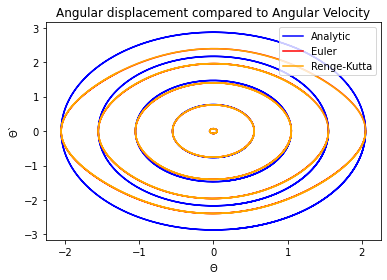

<Figure size 432x288 with 0 Axes>

In [35]:
c1 = Initial_Conditions(0.05,10,0.01,5)

AutoPlot(c1,4,5,0.5)

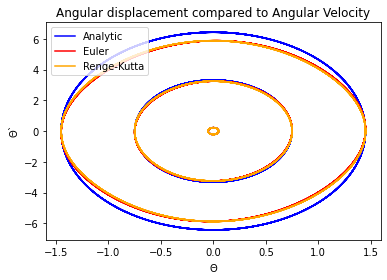

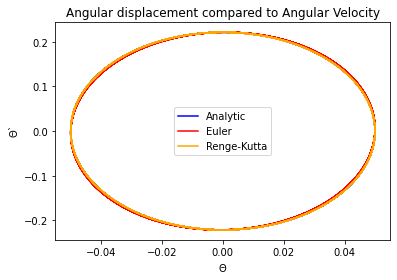

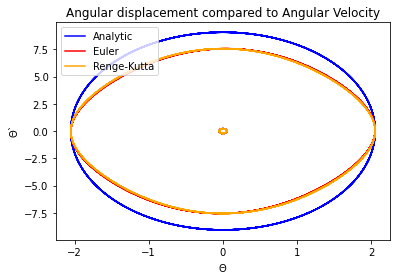

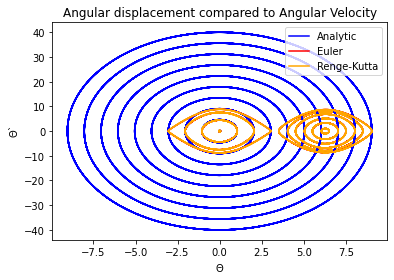

In [36]:
c2=Initial_Conditions(0.05,10,0.01,0.5)

AutoPlot(c2,4,3,0.7)
AutoPlot(c2,4,1)
AutoPlot(c2,4,2,2)
AutoPlot(c2,4,10,1)